#Guitar sound classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

unzip

In [ ]:
import os
import zipfile
import tarfile

folder = '/content/drive/MyDrive/EGFxSET'
supported_extensions = ['.zip', '.tar', '.tar.gz', '.tgz', '.gz']

def extract_all_compressed_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file)[1]

            # 압축 파일인지 확인
            if file_extension in supported_extensions:
                print(f'Found compressed file: {file_path}')
                extract_path = os.path.join(root, os.path.splitext(file)[0])

                # 압축 해제
                try:
                    if file_extension == '.zip':
                        with zipfile.ZipFile(file_path, 'r') as zip_ref:
                            zip_ref.extractall(extract_path)
                    elif file_extension in ['.tar', '.tar.gz', '.tgz']:
                        with tarfile.open(file_path, 'r:*') as tar_ref:
                            tar_ref.extractall(extract_path)
                    elif file_extension == '.gz':
                        # 단일 파일 압축일 경우
                        with open(extract_path, 'wb') as out_f, open(file_path, 'rb') as in_f:
                            out_f.write(in_f.read())

                    print(f'Extracted: {file_path} -> {extract_path}')
                except Exception as e:
                    print(f'Failed to extract {file_path}: {e}')

# 실행
extract_all_compressed_files(folder)

Found compressed file: /content/drive/MyDrive/EGFxSET/Chorus.zip
Extracted: /content/drive/MyDrive/EGFxSET/Chorus.zip -> /content/drive/MyDrive/EGFxSET/Chorus
Found compressed file: /content/drive/MyDrive/EGFxSET/Hall-Reverb.zip
Extracted: /content/drive/MyDrive/EGFxSET/Hall-Reverb.zip -> /content/drive/MyDrive/EGFxSET/Hall-Reverb
Found compressed file: /content/drive/MyDrive/EGFxSET/BluesDriver.zip
Extracted: /content/drive/MyDrive/EGFxSET/BluesDriver.zip -> /content/drive/MyDrive/EGFxSET/BluesDriver
Found compressed file: /content/drive/MyDrive/EGFxSET/Digital-Delay.zip
Extracted: /content/drive/MyDrive/EGFxSET/Digital-Delay.zip -> /content/drive/MyDrive/EGFxSET/Digital-Delay
Found compressed file: /content/drive/MyDrive/EGFxSET/Flanger.zip
Extracted: /content/drive/MyDrive/EGFxSET/Flanger.zip -> /content/drive/MyDrive/EGFxSET/Flanger
Found compressed file: /content/drive/MyDrive/EGFxSET/Clean.zip
Extracted: /content/drive/MyDrive/EGFxSET/Clean.zip -> /content/drive/MyDrive/EGFxSET/C

#CNN의 경우

데이터 전처리

In [ ]:
import os
import pandas as pd

def process_guitar_dataset(root_dir, output_csv):
    # 데이터를 저장할 리스트
    data = []

    # 루트 디렉토리를 순회하면서 모든 하위 디렉토리 탐색
    for root, dirs, files in os.walk(root_dir):
        # 현재 폴더 이름 추출
        current_dir = os.path.basename(root)
        parent_dir = os.path.basename(os.path.dirname(root))

        # 현재 디렉토리가 "position"을 나타내는 경우 처리
        if parent_dir and current_dir:
            # .wav 파일 순회
            for file in files:
                if file.endswith('.wav'):
                    filepath = os.path.join(root, file)
                    # 상위 폴더는 effect, 현재 폴더는 position으로 저장
                    data.append({
                        "filepath": filepath,
                        "effect": parent_dir,
                        "position": current_dir
                    })

    # 데이터프레임 생성
    df = pd.DataFrame(data)

    # CSV 파일로 저장
    df.to_csv(output_csv, index=False)
    print(f"CSV 파일 저장 완료: {output_csv}")

# 데이터셋 루트 디렉토리
dataset_root = "/content/drive/MyDrive/EGFxSET/datasets"
# 출력 CSV 파일 경로
output_csv_path = "/content/drive/MyDrive/EGFxSET/datasets/dataset.csv"

# 데이터 처리 및 저장
process_guitar_dataset(dataset_root, output_csv_path)


CSV 파일 저장 완료: /content/drive/MyDrive/EGFxSET/datasets/dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/EGFxSET/datasets/dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970 entries, 0 to 8969
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  8970 non-null   object
 1   effect    8970 non-null   object
 2   position  8970 non-null   object
dtypes: object(3)
memory usage: 210.4+ KB


In [ ]:
print(df[:1000])

                                              filepath       effect  \
0    /content/drive/MyDrive/EGFxSET/datasets/Chorus...       Chorus   
1    /content/drive/MyDrive/EGFxSET/datasets/Chorus...       Chorus   
2    /content/drive/MyDrive/EGFxSET/datasets/Chorus...       Chorus   
3    /content/drive/MyDrive/EGFxSET/datasets/Chorus...       Chorus   
4    /content/drive/MyDrive/EGFxSET/datasets/Chorus...       Chorus   
..                                                 ...          ...   
995  /content/drive/MyDrive/EGFxSET/datasets/Hall-R...  Hall Reverb   
996  /content/drive/MyDrive/EGFxSET/datasets/Hall-R...  Hall Reverb   
997  /content/drive/MyDrive/EGFxSET/datasets/Hall-R...  Hall Reverb   
998  /content/drive/MyDrive/EGFxSET/datasets/Hall-R...  Hall Reverb   
999  /content/drive/MyDrive/EGFxSET/datasets/Hall-R...  Hall Reverb   

          position  
0             Neck  
1             Neck  
2             Neck  
3             Neck  
4             Neck  
..             ...  


.wav파일을 멜스펙트로그램으로 저장

Streaming output truncated to the last 5000 lines.
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_2-4.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_4-4.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_6-4.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_1-5.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_6-6.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_1-8.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_5-3.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_3-3.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_3-4.wav.png
Saved: /content/drive/MyDrive/EGFxSET/mel_spectrograms/Clean/Clean_Bridge-Middle_1-4.wav.png
Saved: /content/dri

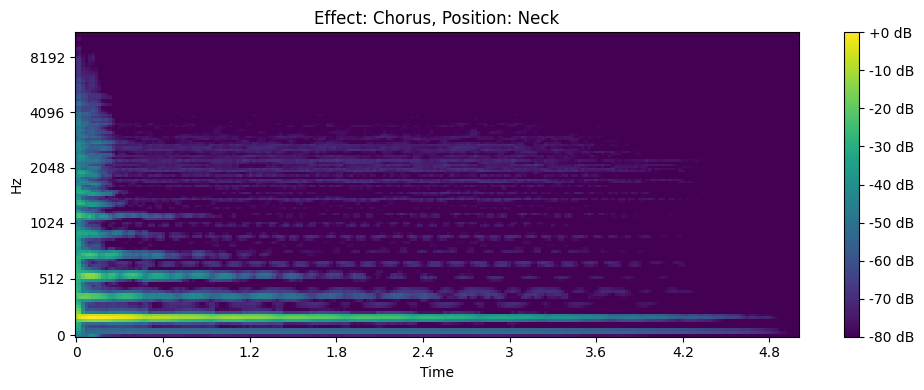

In [ ]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def generate_mel_spectrogram(csv_file, output_dir, sample_rate=22050, n_mels=128):
    # CSV 파일 읽기
    df = pd.read_csv(csv_file)

    for idx, row in df.iterrows():
        try:
            # 오디오 파일 경로
            filepath = row['filepath']
            effect = row['effect']
            position = row['position']

            # 이펙터별 폴더 생성
            effect_dir = os.path.join(output_dir, effect)
            os.makedirs(effect_dir, exist_ok=True)

            # 오디오 파일 로드
            y, sr = librosa.load(filepath, sr=sample_rate)

            # 멜 스펙트로그램 생성
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=sr//2)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # dB로 변환

            # 출력 파일 경로
            output_path = os.path.join(effect_dir, f"{effect}_{position}_{os.path.basename(filepath)}.png")

            # 멜 스펙트로그램 저장
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Effect: {effect}, Position: {position}")
            plt.tight_layout()
            plt.savefig(output_path)
            plt.close()

            print(f"Saved: {output_path}")
        except Exception as e:
            print(f"Error processing {filepath}: {e}")

# CSV 파일 경로
csv_path = "/content/drive/MyDrive/EGFxSET/datasets/dataset.csv"
# 멜 스펙트로그램 이미지 저장 디렉토리
output_directory = "/content/drive/MyDrive/EGFxSET/mel_spectrograms"

# 멜 스펙트로그램 생성
generate_mel_spectrogram(csv_path, output_directory)


In [4]:
import os
import pandas as pd

def create_effect_csv_with_position(base_dir, output_csv):
    # 딕셔너리 형태로 데이터 저장
    data = {}

    # 이펙터 폴더 순회
    for effect in os.listdir(base_dir):
        effect_path = os.path.join(base_dir, effect)
        if os.path.isdir(effect_path):  # 이펙터 폴더 확인
            for file in sorted(os.listdir(effect_path)):  # 파일 정렬
                if file.endswith('.png'):  # PNG 파일만 처리
                    # 파일 이름에서 base_file과 position 추출
                    parts = file.split('_')
                    position = parts[1]  # 포지션 (예: Bridge, Bridge-Middle 등)
                    base_file = parts[-1].replace('.wav.png', '.wav')  # 기본 음원 파일 이름

                    # 데이터 저장 구조 초기화
                    key = (base_file, position)  # base_file과 position을 키로 사용
                    if key not in data:
                        data[key] = {}

                    # 해당 이펙터 컬럼에 파일 경로 추가
                    data[key][effect] = os.path.join(effect_path, file)

    # 데이터프레임 생성
    rows = []
    for (base_file, position), effects in data.items():
        row = {"wavfile": base_file, "position": position}
        row.update(effects)  # 이펙터 컬럼 추가
        rows.append(row)

    df = pd.DataFrame(rows)

    # CSV 파일 저장
    df.to_csv(output_csv, index=False)
    print(f"CSV 파일 저장 완료: {output_csv}")

# 멜스펙트로그램 이미지 폴더 경로
base_directory = "/content/drive/MyDrive/EGFxSET/mel_spectrograms"
# 출력 CSV 파일 경로
output_csv_path = "/content/drive/MyDrive/EGFxSET/mel_spectrograms/mel_spectrograms_with_position.csv"

# CSV 생성
create_effect_csv_with_position(base_directory, output_csv_path)



CSV 파일 저장 완료: /content/drive/MyDrive/EGFxSET/mel_spectrograms/mel_spectrograms_with_position.csv


CNN 적용

In [3]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
def load_data(csv_file, img_size=(128, 128)):
    # CSV 파일 로드
    df = pd.read_csv(csv_file)
    images = []
    labels = []

    for _, row in df.iterrows():
        # Clean 이미지 여부에 따라 라벨 지정
        if not pd.isna(row['Clean']):  # Clean이 비어있지 않다면
            label = 0  # Clean
            img_path = row['Clean']
        else:  # Clean이 비어있고 다른 열이 비어있지 않다면 Other Effects
            label = 1
            img_path = next((row[effect] for effect in df.columns[2:] if not pd.isna(row[effect])), None)

        # 이미지 로드 및 크기 조정
        if img_path and os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 흑백 이미지 로드
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)

    # NumPy 배열로 변환
    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1) / 255.0  # 정규화
    labels = np.array(labels)

    return images, labels

# 데이터 로드
csv_file = "/content/drive/MyDrive/EGFxSET/mel_spectrograms/mel_spectrograms_with_position.csv"
X, y = load_data(csv_file)

# 데이터셋 분리 (학습/검증 세트)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# CNN 모델 정의
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary Classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 모델 생성
input_shape = (128, 128, 1)
model = create_cnn_model(input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.7574 - loss: 0.4411 - val_accuracy: 0.9079 - val_loss: 0.3029
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9064 - loss: 0.3050 - val_accuracy: 0.9079 - val_loss: 0.2736
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9031 - loss: 0.2851 - val_accuracy: 0.9079 - val_loss: 0.2002
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9120 - loss: 0.1931 - val_accuracy: 0.9342 - val_loss: 0.1518
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9599 - loss: 0.0948 - val_accuracy: 0.9408 - val_loss: 0.0816
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9742 - loss: 0.0683 - val_accuracy: 0.9671 - val_loss: 0.0539
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9767 - loss: 0.0633 - val_accuracy: 1.0000 - val_loss: 0.0359
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9861 - loss: 0.0414 - val_accuracy: 0.9803 - v

In [7]:
# 모델 평가
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.9586e-05
Validation Loss: 2.5043882487807423e-05, Validation Accuracy: 1.0


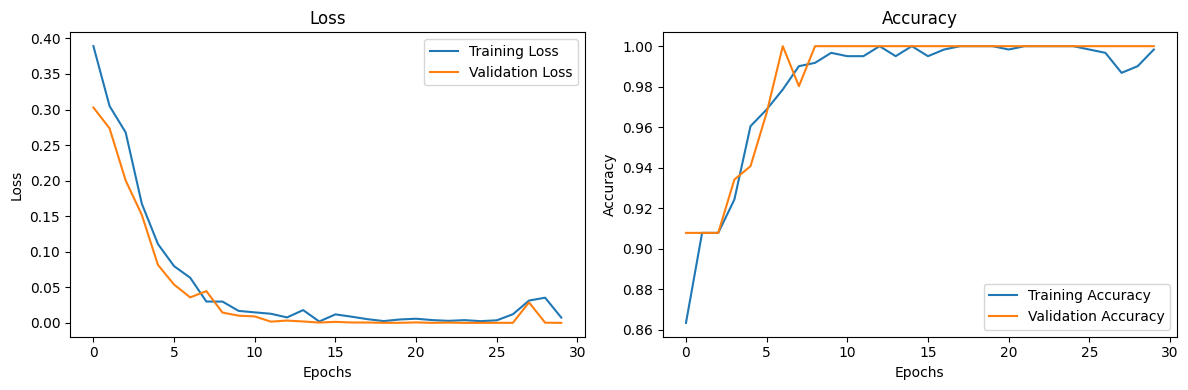

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Loss 그래프
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 모델 학습 결과 시각화
plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


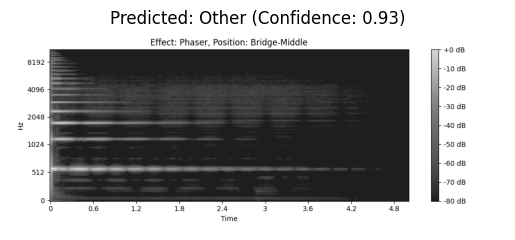

In [16]:
def test_prediction(model, img_path, img_size=(128, 128)):
    import cv2
    # 이미지 로드 및 전처리
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, img_size) / 255.0
    img_resized = img_resized.reshape(1, img_size[0], img_size[1], 1)  # 배치 차원 추가

    # 모델 예측
    prediction = model.predict(img_resized)[0][0]  # sigmoid 출력값
    label = 'Clean' if prediction < 0.5 else 'Other'

    # 시각화
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {label} (Confidence: {prediction:.2f})")
    plt.axis('off')
    plt.show()

# 테스트 예제 이미지 경로
test_img_path = "/content/drive/MyDrive/EGFxSET/mel_spectrograms/Phaser/Phaser_Bridge-Middle_1-10.wav.png"

# 예측 결과 확인
test_prediction(model, test_img_path)